<a href="https://colab.research.google.com/github/dangdinhtai0001/Max-flow--min-cut/blob/master/ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install networkx matplotlib pandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def visualize_step(graph, max_flow, visited, parent, source, sink):
    # Khởi tạo đồ thị G từ ma trận kề của đồ thị
    G = nx.DiGraph()
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] != 0:
                G.add_edge(i, j, capacity=graph[i][j])
    
    # Khởi tạo màu sắc cho các đỉnh và cạnh
    node_colors = ['green' if visited[i] else 'white' for i in range(len(graph))]
    edge_colors = ['red' if parent[i] != -1 else 'black' for i in range(len(graph))]
    edge_labels = {}
    
    # Cập nhật màu sắc cho các cạnh và trọng số tương ứng
    for u in range(len(graph)):
        for v in range(len(graph)):
            if graph[u][v] != 0:
                if parent[v] != -1:
                    flow = graph[u][v] - graph[parent[v]][v]
                    edge_labels[(u, v)] = str(flow) + '/' + str(graph[u][v])
                else:
                    edge_labels[(u, v)] = str(graph[u][v])
                
    # Vẽ đồ thị
    # pos = nx.spring_layout(G)
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=node_colors)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    plt.show()

    # Hiển thị thông tin về đồ thị và luồng
    print(f"------------------ Thông tin về đồ thị và luồng ------------------")
    print("Graph: ")
    print(pd.DataFrame(graph))
    print("Visited: ", visited)
    print(pd.DataFrame(visited))
    print("Parent: ", parent)
    print(pd.DataFrame(parent))
    print("Source: ", source)
    print("Sink: ", sink)
    print("Max flow: ", max_flow)
    print("=================================")
    



In [4]:
def visualize_graph(graph, source, sink):
    G = nx.DiGraph()
    edge_labels = {}
    node_labels = {}
    
    for u in range(len(graph)):
        for v in range(len(graph)):
            if graph[u][v] != 0:
                G.add_edge(u, v, capacity=graph[u][v])
                edge_labels[(u, v)] = str(graph[u][v])
        node_labels[u] = str(u)
    
    # pos = nx.spring_layout(G)
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw_networkx_edges(G, pos, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
    source_node = plt.Circle(pos[source], radius=0.15, color='red')
    sink_node = plt.Circle(pos[sink], radius=0.15, color='green')
    plt.gca().add_patch(source_node)
    plt.gca().add_patch(sink_node)
    
    plt.axis('off')
    plt.show()

In [ ]:
def ford_fulkerson(graph, source, sink):
    # Khởi tạo luồng ban đầu là 0
    max_flow = 0
    
    # Vòng lặp chính của thuật toán
    while True:
        # Khởi tạo mảng visited để lưu trạng thái duyệt của các đỉnh
        visited = [False] * len(graph)
        
        # Khởi tạo mảng parent để lưu trạng thái của đường đi
        parent = [-1] * len(graph)
        
        # Khởi tạo hàng đợi để lưu các đỉnh cần duyệt
        queue = []
        
        # Đưa đỉnh nguồn vào hàng đợi
        queue.append(source)
        visited[source] = True
        
        # Vòng lặp BFS để tìm đường tăng luồng
        while queue:
            u = queue.pop(0)
            for v in range(len(graph)):
                if not visited[v] and graph[u][v] > 0:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)
        
        # Nếu không còn đường tăng luồng nữa thì thoát vòng lặp
        if not visited[sink]:
            break
        
        # Tìm giá trị tăng luồng
        flow = float("inf")
        v = sink
        while v != source:
            u = parent[v]
            flow = min(flow, graph[u][v])
            v = u
        
        # Cập nhật đồ thị và luồng
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v] -= flow
            graph[v][u] += flow
            v = u
        max_flow += flow
    
    # Trả về luồng cực đại
    return max_flow


In [ ]:
def ford_fulkerson_with_visualize_step(graph, source, sink):
    # Khởi tạo luồng ban đầu là 0
    max_flow = 0
    
    # Vòng lặp chính của thuật toán
    while True:
        # Khởi tạo mảng visited để lưu trạng thái duyệt của các đỉnh
        visited = [False] * len(graph)
        
        # Khởi tạo mảng parent để lưu trạng thái của đường đi
        parent = [-1] * len(graph)
        
        # Khởi tạo hàng đợi để lưu các đỉnh cần duyệt
        queue = []
        
        # Đưa đỉnh nguồn vào hàng đợi
        queue.append(source)
        visited[source] = True
        
        # Vòng lặp BFS để tìm đường tăng luồng
        while queue:
            u = queue.pop(0)
            for v in range(len(graph)):
                if not visited[v] and graph[u][v] > 0:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)
                    visualize_step(graph, max_flow, visited, parent, source, sink)
        
        # Nếu không còn đường tăng luồng nữa thì thoát vòng lặp
        if not visited[sink]:
            break
        
        # Tìm giá trị tăng luồng
        flow = float('inf')
        v = sink
        while v != source:
            u = parent[v]
            flow = min(flow, graph[u][v])
            v = u
        
        # Cập nhật đồ thị và luồng
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v] -= flow
            graph[v][u] += flow
            v = u
        max_flow += flow
        visualize_step(graph, max_flow, visited, parent, source, sink)
    
    # Trả về luồng cực đại
    return max_flow


In [32]:
def ford_fulkerson_with_visualize_step_has_description(graph, source, sink):
    # Khởi tạo luồng ban đầu là 0
    max_flow = 0
    
    # Vòng lặp chính của thuật toán
    while True:
        # Khởi tạo mảng visited để lưu trạng thái duyệt của các đỉnh
        visited = [False] * len(graph)
        
        # Khởi tạo mảng parent để lưu trạng thái của đường đi
        parent = [-1] * len(graph)
        
        # Khởi tạo hàng đợi để lưu các đỉnh cần duyệt
        queue = []
        
        # Đưa đỉnh nguồn vào hàng đợi
        queue.append(source)
        visited[source] = True

        print("Khởi tạo thông tin, Đưa đỉnh nguồn vào hàng đợi")
        visualize_step(graph, max_flow, visited, parent, source, sink)
        
        # Vòng lặp BFS để tìm đường tăng luồng
        while queue:
            u = queue.pop(0)
            print(f"[Duyệt BFS-1] Bắt đầu duyệt đỉnh {u}")
            for v in range(len(graph)):
                if not visited[v] and graph[u][v] > 0:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)
                    print(f"[Duyệt BFS-2] Thêm đỉnh {v} vào hàng đợi và đánh đã duyệt")
                    visualize_step(graph, max_flow, visited, parent, source, sink)
                    
                    if v == sink:
                        # Tìm đường đi từ đích về nguồn
                        path = []
                        f = float('inf')

                        while v != source:
                            u = parent[v]
                            f = min(f, graph[u][v])
                            path.append(v)
                            v = u
                            
                        path.append(source)
                        
                        # In ra đường tăng luồng và giá trị của nó
                        path.reverse()
                        print(f"[Đường tăng luồng]: {' -> '.join(map(str, path))}, Giá trị: {f}")
            print(f"[Duyệt BFS-3] Đã duyệt xong đỉnh {u}")

        """
        Lệnh print [Duyệt BFS-1]n sẽ in ra thông tin về đỉnh đang được duyệt
        lệnh print [Duyệt BFS-2] sẽ in ra thông tin về đỉnh mới được thêm vào hàng đợi và được đánh dấu là đã được duyệt. 
        """

        # Nếu không còn đường tăng luồng nữa thì thoát vòng lặp
        if not visited[sink]:
            break
        
        # Tìm giá trị tăng luồng
        flow = float('inf')
        v = sink
        while v != source:
            u = parent[v]
            flow = min(flow, graph[u][v])
            v = u
      

        # Cập nhật đồ thị và luồng
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v] -= flow
            graph[v][u] += flow
            v = u

        max_flow += flow
        print(f"[Updating graph and flow]: max_flow={max_flow}")
        visualize_step(graph, max_flow, visited, parent, source, sink)

    # Trả về luồng cực đại
    return max_flow

Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Source:  0
Sink:  5



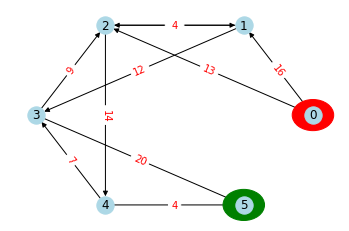


================================= Bắt đầu thuật toán (Ford-Fulkerson )
Khởi tạo thông tin, Đưa đỉnh nguồn vào hàng đợi


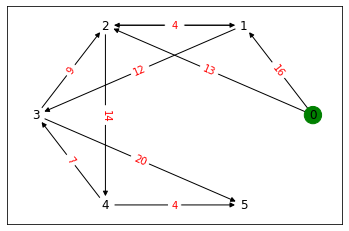

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Visited:  [True, False, False, False, False, False]
       0
0   True
1  False
2  False
3  False
4  False
5  False
Parent:  [-1, -1, -1, -1, -1, -1]
   0
0 -1
1 -1
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 0
[Duyệt BFS-2] Thêm đỉnh 1 vào hàng đợi và đánh đã duyệt


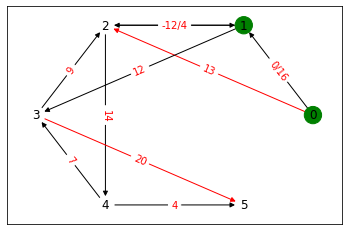

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Visited:  [True, True, False, False, False, False]
       0
0   True
1   True
2  False
3  False
4  False
5  False
Parent:  [-1, 0, -1, -1, -1, -1]
   0
0 -1
1  0
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  0
[Duyệt BFS-2] Thêm đỉnh 2 vào hàng đợi và đánh đã duyệt


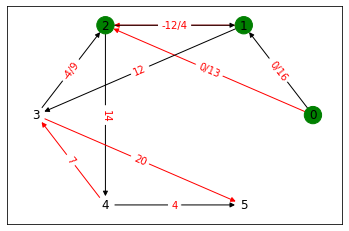

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Visited:  [True, True, True, False, False, False]
       0
0   True
1   True
2   True
3  False
4  False
5  False
Parent:  [-1, 0, 0, -1, -1, -1]
   0
0 -1
1  0
2  0
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  0
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 1
[Duyệt BFS-2] Thêm đỉnh 3 vào hàng đợi và đánh đã duyệt


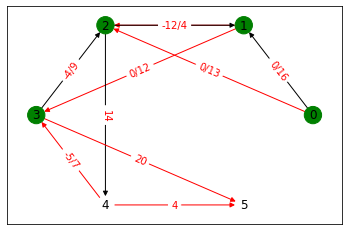

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Visited:  [True, True, True, True, False, False]
       0
0   True
1   True
2   True
3   True
4  False
5  False
Parent:  [-1, 0, 0, 1, -1, -1]
   0
0 -1
1  0
2  0
3  1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  0
[Duyệt BFS-3] Đã duyệt xong đỉnh 1
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 2
[Duyệt BFS-2] Thêm đỉnh 4 vào hàng đợi và đánh đã duyệt


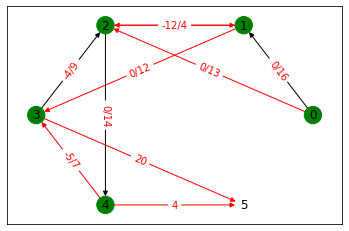

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Visited:  [True, True, True, True, True, False]
       0
0   True
1   True
2   True
3   True
4   True
5  False
Parent:  [-1, 0, 0, 1, 2, -1]
   0
0 -1
1  0
2  0
3  1
4  2
5 -1
Source:  0
Sink:  5
Max flow:  0
[Duyệt BFS-3] Đã duyệt xong đỉnh 2
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 3
[Duyệt BFS-2] Thêm đỉnh 5 vào hàng đợi và đánh đã duyệt


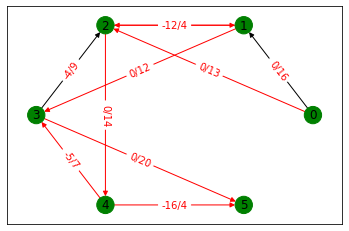

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
   0   1   2   3   4   5
0  0  16  13   0   0   0
1  0   0  10  12   0   0
2  0   4   0   0  14   0
3  0   0   9   0   0  20
4  0   0   0   7   0   4
5  0   0   0   0   0   0
Visited:  [True, True, True, True, True, True]
      0
0  True
1  True
2  True
3  True
4  True
5  True
Parent:  [-1, 0, 0, 1, 2, 3]
   0
0 -1
1  0
2  0
3  1
4  2
5  3
Source:  0
Sink:  5
Max flow:  0
[Đường tăng luồng]: 0 -> 1 -> 3 -> 5, Giá trị: 12
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 4
[Duyệt BFS-3] Đã duyệt xong đỉnh 4
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 5
[Duyệt BFS-3] Đã duyệt xong đỉnh 5
[Updating graph and flow]: max_flow=12


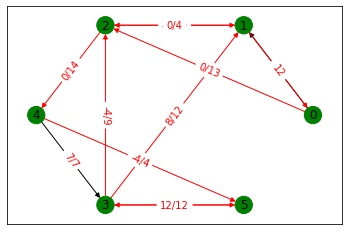

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, True, True, True, True, True]
      0
0  True
1  True
2  True
3  True
4  True
5  True
Parent:  [-1, 0, 0, 1, 2, 3]
   0
0 -1
1  0
2  0
3  1
4  2
5  3
Source:  0
Sink:  5
Max flow:  12
Khởi tạo thông tin, Đưa đỉnh nguồn vào hàng đợi


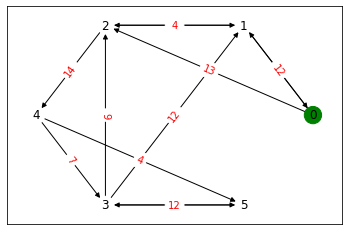

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, False, False, False, False, False]
       0
0   True
1  False
2  False
3  False
4  False
5  False
Parent:  [-1, -1, -1, -1, -1, -1]
   0
0 -1
1 -1
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  12
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 0
[Duyệt BFS-2] Thêm đỉnh 1 vào hàng đợi và đánh đã duyệt


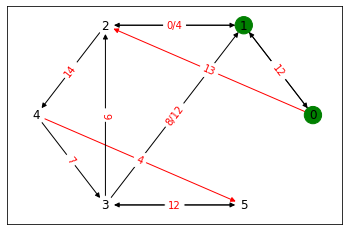

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, True, False, False, False, False]
       0
0   True
1   True
2  False
3  False
4  False
5  False
Parent:  [-1, 0, -1, -1, -1, -1]
   0
0 -1
1  0
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  12
[Duyệt BFS-2] Thêm đỉnh 2 vào hàng đợi và đánh đã duyệt


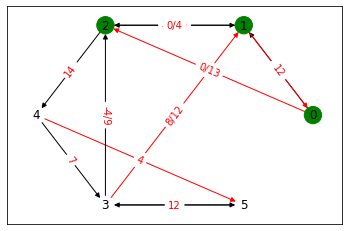

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, True, True, False, False, False]
       0
0   True
1   True
2   True
3  False
4  False
5  False
Parent:  [-1, 0, 0, -1, -1, -1]
   0
0 -1
1  0
2  0
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  12
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 1
[Duyệt BFS-3] Đã duyệt xong đỉnh 1
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 2
[Duyệt BFS-2] Thêm đỉnh 4 vào hàng đợi và đánh đã duyệt


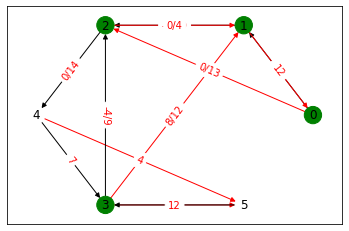

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, True, True, False, True, False]
       0
0   True
1   True
2   True
3  False
4   True
5  False
Parent:  [-1, 0, 0, -1, 2, -1]
   0
0 -1
1  0
2  0
3 -1
4  2
5 -1
Source:  0
Sink:  5
Max flow:  12
[Duyệt BFS-3] Đã duyệt xong đỉnh 2
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 4
[Duyệt BFS-2] Thêm đỉnh 3 vào hàng đợi và đánh đã duyệt


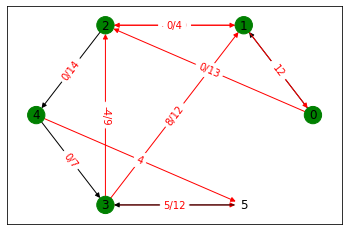

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, True, True, True, True, False]
       0
0   True
1   True
2   True
3   True
4   True
5  False
Parent:  [-1, 0, 0, 4, 2, -1]
   0
0 -1
1  0
2  0
3  4
4  2
5 -1
Source:  0
Sink:  5
Max flow:  12
[Duyệt BFS-2] Thêm đỉnh 5 vào hàng đợi và đánh đã duyệt


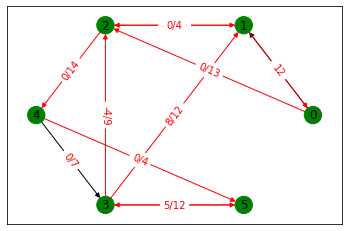

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4  13   0   0  0
1  12   0  10   0   0  0
2   0   4   0   0  14  0
3   0  12   9   0   0  8
4   0   0   0   7   0  4
5   0   0   0  12   0  0
Visited:  [True, True, True, True, True, True]
      0
0  True
1  True
2  True
3  True
4  True
5  True
Parent:  [-1, 0, 0, 4, 2, 4]
   0
0 -1
1  0
2  0
3  4
4  2
5  4
Source:  0
Sink:  5
Max flow:  12
[Đường tăng luồng]: 0 -> 2 -> 4 -> 5, Giá trị: 4
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 3
[Duyệt BFS-3] Đã duyệt xong đỉnh 3
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 5
[Duyệt BFS-3] Đã duyệt xong đỉnh 5
[Updating graph and flow]: max_flow=16


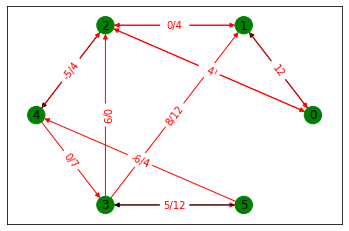

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, True, True, True, True, True]
      0
0  True
1  True
2  True
3  True
4  True
5  True
Parent:  [-1, 0, 0, 4, 2, 4]
   0
0 -1
1  0
2  0
3  4
4  2
5  4
Source:  0
Sink:  5
Max flow:  16
Khởi tạo thông tin, Đưa đỉnh nguồn vào hàng đợi


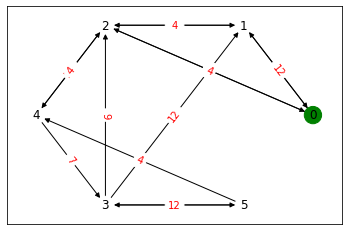

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, False, False, False, False, False]
       0
0   True
1  False
2  False
3  False
4  False
5  False
Parent:  [-1, -1, -1, -1, -1, -1]
   0
0 -1
1 -1
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  16
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 0
[Duyệt BFS-2] Thêm đỉnh 1 vào hàng đợi và đánh đã duyệt


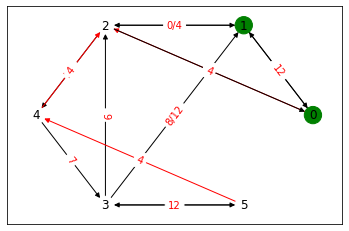

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, True, False, False, False, False]
       0
0   True
1   True
2  False
3  False
4  False
5  False
Parent:  [-1, 0, -1, -1, -1, -1]
   0
0 -1
1  0
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  16
[Duyệt BFS-2] Thêm đỉnh 2 vào hàng đợi và đánh đã duyệt


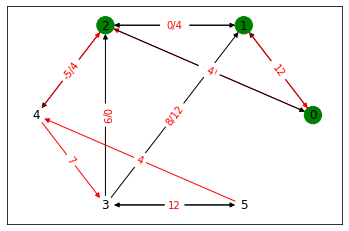

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, True, True, False, False, False]
       0
0   True
1   True
2   True
3  False
4  False
5  False
Parent:  [-1, 0, 0, -1, -1, -1]
   0
0 -1
1  0
2  0
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  16
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 1
[Duyệt BFS-3] Đã duyệt xong đỉnh 1
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 2
[Duyệt BFS-2] Thêm đỉnh 4 vào hàng đợi và đánh đã duyệt


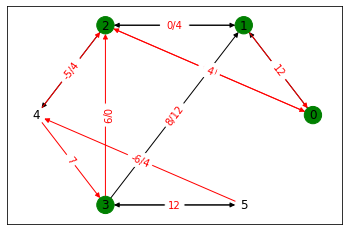

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, True, True, False, True, False]
       0
0   True
1   True
2   True
3  False
4   True
5  False
Parent:  [-1, 0, 0, -1, 2, -1]
   0
0 -1
1  0
2  0
3 -1
4  2
5 -1
Source:  0
Sink:  5
Max flow:  16
[Duyệt BFS-3] Đã duyệt xong đỉnh 2
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 4
[Duyệt BFS-2] Thêm đỉnh 3 vào hàng đợi và đánh đã duyệt


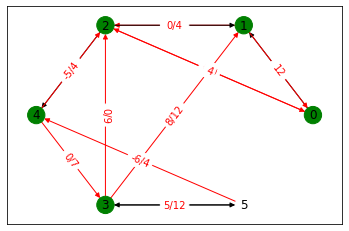

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, True, True, True, True, False]
       0
0   True
1   True
2   True
3   True
4   True
5  False
Parent:  [-1, 0, 0, 4, 2, -1]
   0
0 -1
1  0
2  0
3  4
4  2
5 -1
Source:  0
Sink:  5
Max flow:  16
[Duyệt BFS-3] Đã duyệt xong đỉnh 4
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 3
[Duyệt BFS-2] Thêm đỉnh 5 vào hàng đợi và đánh đã duyệt


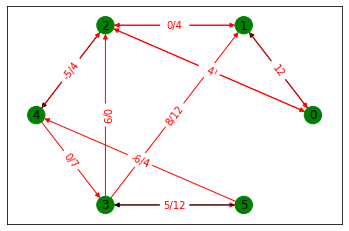

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3   4  5
0   0   4   9   0   0  0
1  12   0  10   0   0  0
2   4   4   0   0  10  0
3   0  12   9   0   0  8
4   0   0   4   7   0  0
5   0   0   0  12   4  0
Visited:  [True, True, True, True, True, True]
      0
0  True
1  True
2  True
3  True
4  True
5  True
Parent:  [-1, 0, 0, 4, 2, 3]
   0
0 -1
1  0
2  0
3  4
4  2
5  3
Source:  0
Sink:  5
Max flow:  16
[Đường tăng luồng]: 0 -> 2 -> 4 -> 3 -> 5, Giá trị: 7
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 5
[Duyệt BFS-3] Đã duyệt xong đỉnh 5
[Updating graph and flow]: max_flow=23


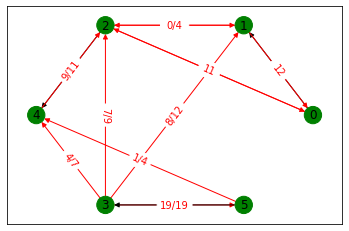

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3  4  5
0   0   4   2   0  0  0
1  12   0  10   0  0  0
2  11   4   0   0  3  0
3   0  12   9   0  7  1
4   0   0  11   0  0  0
5   0   0   0  19  4  0
Visited:  [True, True, True, True, True, True]
      0
0  True
1  True
2  True
3  True
4  True
5  True
Parent:  [-1, 0, 0, 4, 2, 3]
   0
0 -1
1  0
2  0
3  4
4  2
5  3
Source:  0
Sink:  5
Max flow:  23
Khởi tạo thông tin, Đưa đỉnh nguồn vào hàng đợi


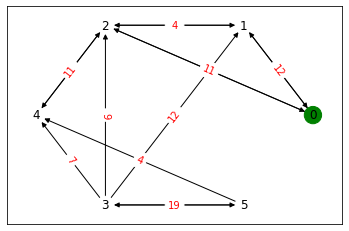

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3  4  5
0   0   4   2   0  0  0
1  12   0  10   0  0  0
2  11   4   0   0  3  0
3   0  12   9   0  7  1
4   0   0  11   0  0  0
5   0   0   0  19  4  0
Visited:  [True, False, False, False, False, False]
       0
0   True
1  False
2  False
3  False
4  False
5  False
Parent:  [-1, -1, -1, -1, -1, -1]
   0
0 -1
1 -1
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  23
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 0
[Duyệt BFS-2] Thêm đỉnh 1 vào hàng đợi và đánh đã duyệt


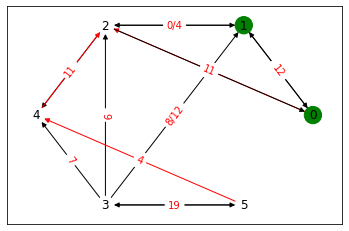

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3  4  5
0   0   4   2   0  0  0
1  12   0  10   0  0  0
2  11   4   0   0  3  0
3   0  12   9   0  7  1
4   0   0  11   0  0  0
5   0   0   0  19  4  0
Visited:  [True, True, False, False, False, False]
       0
0   True
1   True
2  False
3  False
4  False
5  False
Parent:  [-1, 0, -1, -1, -1, -1]
   0
0 -1
1  0
2 -1
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  23
[Duyệt BFS-2] Thêm đỉnh 2 vào hàng đợi và đánh đã duyệt


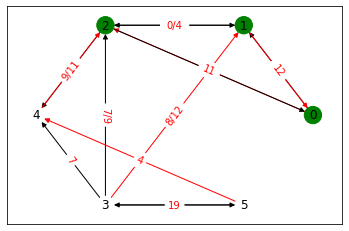

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3  4  5
0   0   4   2   0  0  0
1  12   0  10   0  0  0
2  11   4   0   0  3  0
3   0  12   9   0  7  1
4   0   0  11   0  0  0
5   0   0   0  19  4  0
Visited:  [True, True, True, False, False, False]
       0
0   True
1   True
2   True
3  False
4  False
5  False
Parent:  [-1, 0, 0, -1, -1, -1]
   0
0 -1
1  0
2  0
3 -1
4 -1
5 -1
Source:  0
Sink:  5
Max flow:  23
[Duyệt BFS-3] Đã duyệt xong đỉnh 0
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 1
[Duyệt BFS-3] Đã duyệt xong đỉnh 1
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 2
[Duyệt BFS-2] Thêm đỉnh 4 vào hàng đợi và đánh đã duyệt


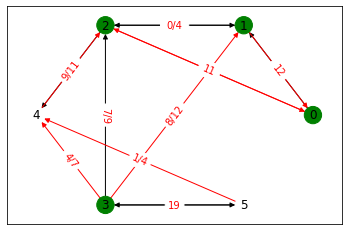

------------------ Thông tin về đồ thị và luồng ------------------
Graph: 
    0   1   2   3  4  5
0   0   4   2   0  0  0
1  12   0  10   0  0  0
2  11   4   0   0  3  0
3   0  12   9   0  7  1
4   0   0  11   0  0  0
5   0   0   0  19  4  0
Visited:  [True, True, True, False, True, False]
       0
0   True
1   True
2   True
3  False
4   True
5  False
Parent:  [-1, 0, 0, -1, 2, -1]
   0
0 -1
1  0
2  0
3 -1
4  2
5 -1
Source:  0
Sink:  5
Max flow:  23
[Duyệt BFS-3] Đã duyệt xong đỉnh 2
[Duyệt BFS-1] Bắt đầu duyệt đỉnh 4
[Duyệt BFS-3] Đã duyệt xong đỉnh 4
================================= Kết thúc thuật toán (Ford-Fulkerson ) 
Luồng cực đại từ đỉnh 0 đến đỉnh 5 là 23


In [35]:
graph = [    
    [0, 16, 13, 0, 0, 0],
    [0, 0, 10, 12, 0, 0],
    [0, 4, 0, 0, 14, 0],
    [0, 0, 9, 0, 0, 20],
    [0, 0, 0, 7, 0, 4],
    [0, 0, 0, 0, 0, 0]
]
source = 0
sink = 5

# Hiển thị thông tin về đồ thị
print("Graph: ")
print(pd.DataFrame(graph))
print("Source: ", source)
print("Sink: ", sink)
print()
visualize_graph(graph, source, sink)
print()
print("================================= Bắt đầu thuật toán (Ford-Fulkerson )")

# max_flow = ford_fulkerson_with_visualize_step(graph, source, sink)
max_flow = ford_fulkerson_with_visualize_step_has_description(graph, source, sink)

print("================================= Kết thúc thuật toán (Ford-Fulkerson ) ")

print("Luồng cực đại từ đỉnh", source, "đến đỉnh", sink, "là", max_flow)